<a href="https://colab.research.google.com/github/WhiteFox-Lugh/e-ty-rating-simulation/blob/main/analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# drive に入れたスコアの分布を取り出す
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
import csv
import numpy as np
import seaborn as sns
from scipy.stats import norm

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/e-typing/e-typing_r_ranking.csv')

In [ ]:
sample = dataset['点数'].values

In [ ]:
# 定数
# 打数 (元気ワードは 350～400 が望ましい？）
k = 375.0
# 精度（0.95 程度）
a = 0.95
# ワード数 15 固定
w = 15.0
# レイテンシ平均
l = 0.5 / 60.0

In [ ]:
estimated_kpm = sample * k / (a * a * a * k - sample * w * l)
estimated_kpm

array([1524.66788715, 1473.92815759, 1395.91948017, ...,    4.67412579,
          3.50395655,    3.50395655])

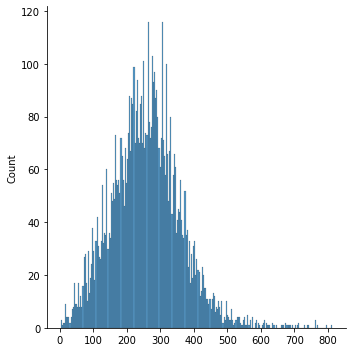

In [ ]:
sns.displot(sample, bins=250)

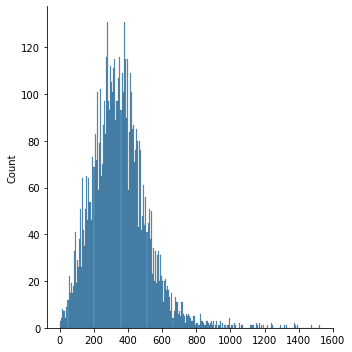

In [ ]:
sns.displot(estimated_kpm, bins=250)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


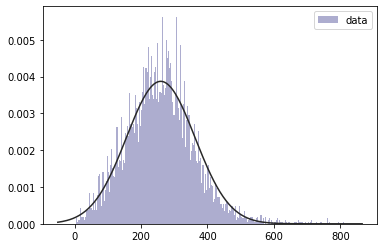

In [ ]:
sns.distplot(
    sample, bins=250, color='#333388', label='data',
    hist=True,
    kde=False,
    rug=False,
    fit=norm
)
plt.legend() # 凡例を表示
plt.show()   # ヒストグラムを表示

In [ ]:
param = norm.fit(sample)

In [ ]:
param

(259.21320991528086, 103.11067502144004)

In [ ]:
[(param[0] + i * param[1]) for i in range(-3, 7, 1)]

[-50.11881514903928,
 52.99185987240077,
 156.1025348938408,
 259.21320991528086,
 362.3238849367209,
 465.43455995816095,
 568.545234979601,
 671.6559100010411,
 774.7665850224812,
 877.8772600439211]